# Base Line Forecast

In [1]:
import pandas as pd

url = "https://github.com/sinha610/Replenishment-Forecasting-Baseline/raw/main/SALES_TRANS_Adidas.csv"
df = pd.read_csv(url)
df.head()


,DATE,ACTUAL_DEMAND
0,1/31/21,155493.94
1,02-01-2021,160956.79
2,02-02-2021,151982.63
3,02-03-2021,162670.26
4,02-04-2021,141371.52


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           958 non-null    object 
 1   ACTUAL_DEMAND  958 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.1+ KB


In [3]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


C:\Users\nehas\AppData\Local\Temp\ipykernel_19956\2967002165.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


In [4]:
df.head(10)

,DATE,ACTUAL_DEMAND
0,2021-01-31,155493.94
1,2021-02-01,160956.79
2,2021-02-02,151982.63
3,2021-02-03,162670.26
4,2021-02-04,141371.52
5,2021-02-05,238178.96
6,2021-02-06,175326.92
7,2021-02-07,203005.62
8,2021-02-08,152140.76
9,2021-02-09,175224.00


In [5]:
df.tail(10)

,DATE,ACTUAL_DEMAND
948,2023-09-06,224138.79
949,2023-09-07,198923.79
950,2023-09-08,194082.60
951,2023-09-09,230466.07
952,2023-09-10,257055.72
953,2023-09-11,233657.97
954,2023-09-12,305999.21
955,2023-09-13,270373.96
956,2023-09-14,210024.84
957,2023-09-15,14393.14


In [6]:
df = df.sort_values('DATE').reset_index(drop=True)

In [15]:
full_range = pd.date_range(df['DATE'].min(), df['DATE'].max(), freq='D')
missing_dates = full_range.difference(df['DATE'])

print("Date range:", df['DATE'].min(), "to", df['DATE'].max())
print("Total days in range:", len(full_range))
print("Rows in dataframe:", len(df))
print("Missing calendar days count:", len(missing_dates))
print(len(missing_dates))

Date range: 2021-01-31 00:00:00 to 2023-09-15 00:00:00
Total days in range: 958
Rows in dataframe: 958
Missing calendar days count: 0
0


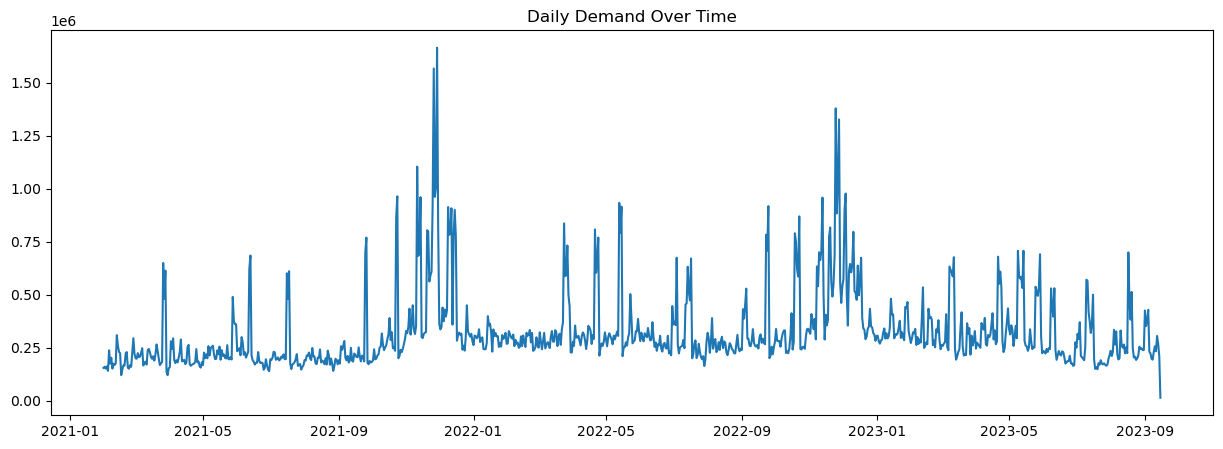

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df['DATE'], df['ACTUAL_DEMAND'])
plt.title("Daily Demand Over Time")
plt.show()


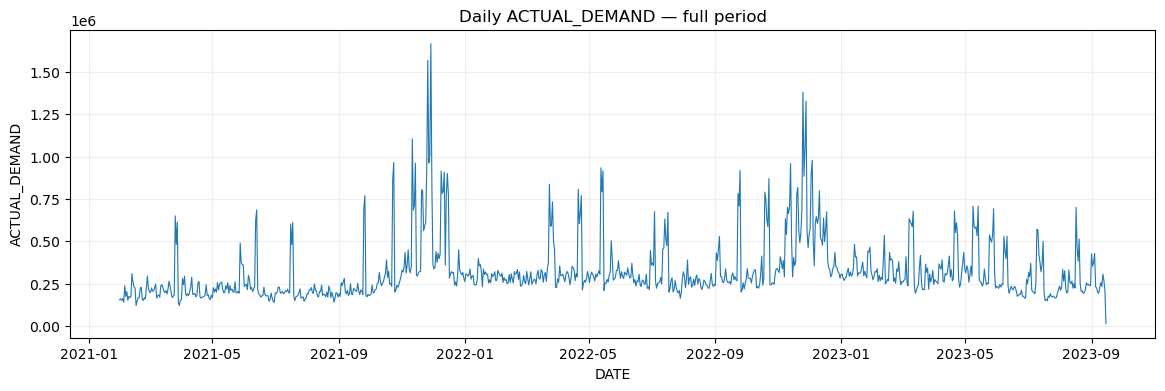

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(df['DATE'], df['ACTUAL_DEMAND'], linewidth=0.8)
plt.title('Daily ACTUAL_DEMAND — full period')
plt.xlabel('DATE')
plt.ylabel('ACTUAL_DEMAND')
plt.grid(alpha=0.2)
plt.show()


In [18]:

# median vs mean
mean = df['ACTUAL_DEMAND'].mean()
median = df['ACTUAL_DEMAND'].median()
print(f"\nMean: {mean:.2f}, Median: {median:.2f}, Mean/Median ratio: {mean/median:.2f}")

# simple skew check using quantiles
q1, q3 = df['ACTUAL_DEMAND'].quantile([0.25, 0.75])
iqr = q3 - q1
upper_whisker = q3 + 1.5*iqr
lower_whisker = q1 - 1.5*iqr
print(f"IQR: {iqr:.2f}, Lower_whisker: {lower_whisker:.2f}, Upper_whisker: {upper_whisker:.2f}")
print("Pct rows above upper whisker:", (df['ACTUAL_DEMAND'] > upper_whisker).mean())



Mean: 320434.41, Median: 269897.24, Mean/Median ratio: 1.19
IQR: 115577.67, Lower_whisker: 45723.53, Upper_whisker: 508034.20
Pct rows above upper whisker: 0.11691022964509394


In [19]:
# weekday pattern
df['weekday'] = df['DATE'].dt.day_name()
weekday = df.groupby(df['DATE'].dt.weekday)['ACTUAL_DEMAND'].agg(['mean','median','std','count'])
weekday.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'][:len(weekday)]
print("Weekday summary:\n", weekday)

# monthly pattern (by calendar month)
df['month'] = df['DATE'].dt.month
monthly = df.groupby('month')['ACTUAL_DEMAND'].agg(['mean','median','std','count'])
print("\nMonthly summary:\n", monthly)


Weekday summary:
               mean      median            std  count
Mon  299486.816496  257800.060  181198.448751    137
Tue  275333.663869  254396.610  115522.657963    137
Wed  276930.851898  251467.620  118246.014779    137
Thu  309477.621095  259013.650  177973.567460    137
Fri  332194.739489  274699.070  204795.199005    137
Sat  349868.582132  300213.155  177129.816176    136
Sun  399963.412555  320523.710  211068.689173    137

Monthly summary:
                 mean      median            std  count
month                                                 
1      313603.853016  304978.760   55715.381370     63
2      264610.718095  267628.500   73319.190034     84
3      306358.459570  259225.640  145406.029771     93
4      298427.659667  276495.525  130379.260384     90
5      331957.139892  282634.640  156975.550122     93
6      254880.193333  232872.810   95188.999280     90
7      268276.341398  208786.180  132377.450017     93
8      245278.861613  233572.330   75882.526

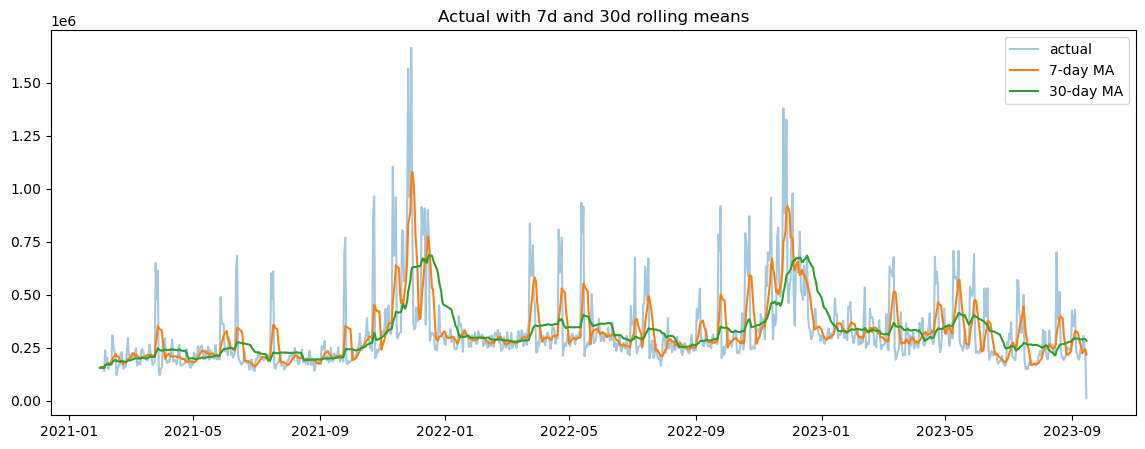

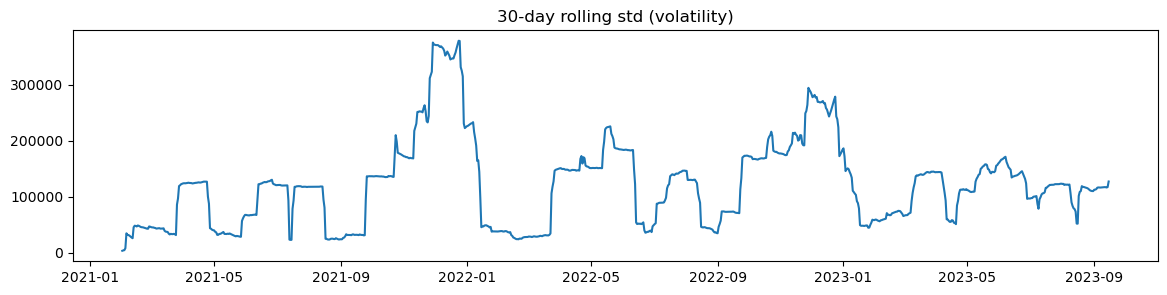

In [20]:
df['rolling_7']  = df['ACTUAL_DEMAND'].rolling(window=7, min_periods=1).mean()
df['rolling_30'] = df['ACTUAL_DEMAND'].rolling(window=30, min_periods=1).mean()
df['rolling_30_std'] = df['ACTUAL_DEMAND'].rolling(window=30, min_periods=1).std()

plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['ACTUAL_DEMAND'], alpha=0.4, label='actual')
plt.plot(df['DATE'], df['rolling_7'], label='7-day MA')
plt.plot(df['DATE'], df['rolling_30'], label='30-day MA')
plt.legend()
plt.title('Actual with 7d and 30d rolling means')
plt.show()

plt.figure(figsize=(14,3))
plt.plot(df['DATE'], df['rolling_30_std'])
plt.title('30-day rolling std (volatility)')
plt.show()


ADF stat: -3.662196898958239 p-value: 0.004677426456182243


C:\Users\nehas\AppData\Local\Temp\ipykernel_19956\2631711546.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = adfuller(df['ACTUAL_DEMAND'].fillna(method='ffill'))
